# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [73]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(14, 5)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [42]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [81]:
height_samples = get_sample(athletes, "height", 3000)
weight_samples = get_sample(athletes, "weight", 3000)
height_samples.describe(), weight_samples.describe()

(count    3000.000000
 mean        1.766780
 std         0.112402
 min         1.330000
 25%         1.690000
 50%         1.760000
 75%         1.840000
 max         2.150000
 Name: height, dtype: float64, count    3000.000000
 mean       72.122667
 std        16.366742
 min        37.000000
 25%        60.000000
 50%        70.000000
 75%        81.000000
 max       160.000000
 Name: weight, dtype: float64)

In [37]:
nanf = athletes.query("(height != height | weight != weight) & (nationality == ['BRA', 'USA', 'CAM'])")
print(f" Há '{nanf.shape[0]}' nan's")

 Há '34' nan's


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [67]:
def q1():
    # Retorne aqui o resultado da questão 1.
    height_samples = get_sample(athletes, "height", 3000)
    shapiro_test = sct.shapiro(height_samples)
    return bool(shapiro_test[1] >= 0.05)
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

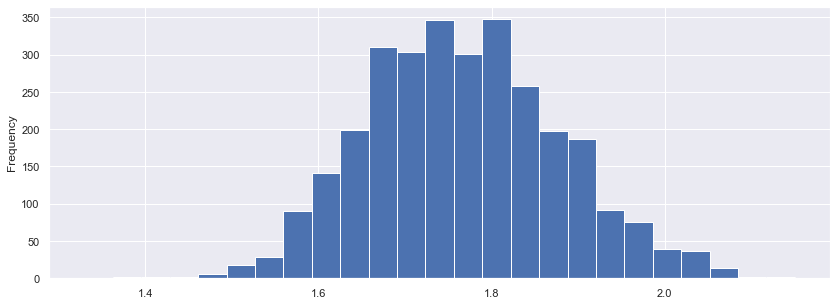

In [74]:
height_samples.plot(bins=25, kind="hist");

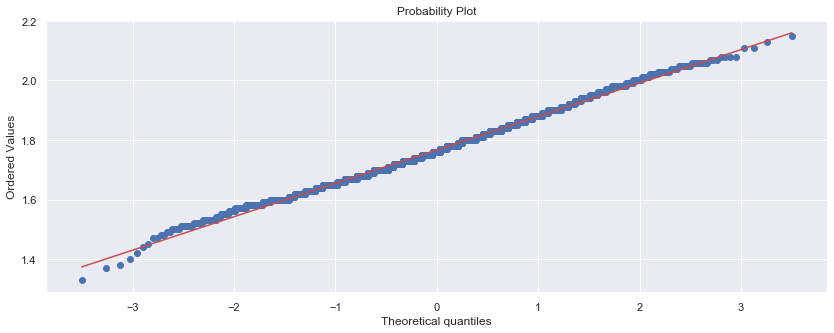

In [125]:
sct.probplot(height_samples, plot=plt);

In [140]:
sct.shapiro(height_samples)[1] #0.000000568 é muito pequeno

5.681722541339695e-07

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [78]:
def q2():
    # Retorne aqui o resultado da questão 2.
    height_samples = get_sample(athletes, "height", 3000)
    jarqueBera_test = sct.jarque_bera(height_samples)
    return bool(jarqueBera_test[1] >= 0.5)
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [77]:
def q3():
    # Retorne aqui o resultado da questão 3.
    weight_samples = get_sample(athletes, "weight", 3000)
    dAgostino_test = sct.normaltest(weight_samples)
    return bool(dAgostino_test.pvalue >= 0.05)
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

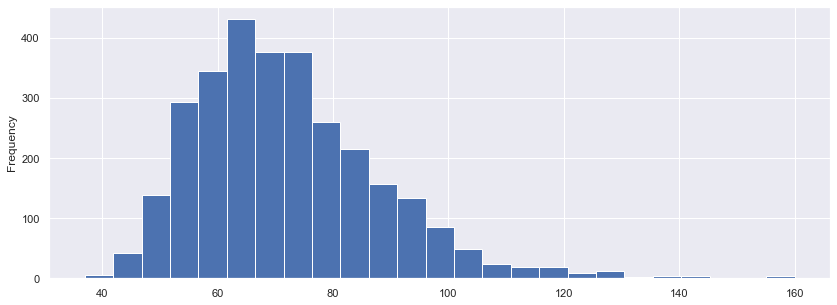

In [85]:
weight_samples.plot(kind="hist", bins=25);

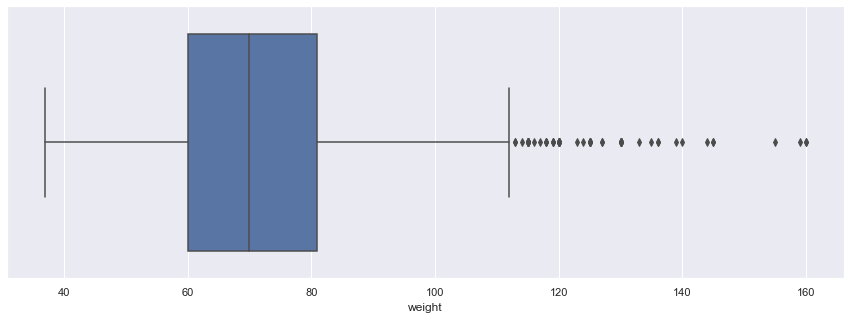

In [92]:
plt.figure(figsize=(15,5))
sns.boxplot(weight_samples);

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [9]:
def q4():
    # Retorne aqui o resultado da questão 4.
    weight_samples = get_sample(athletes, "weight", 3000)
    weight_samples_log = np.log(weight_samples)
    dAgostino_test = sct.normaltest(weight_samples)
    return bool(dAgostino_test.pvalue >= 0.05)
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

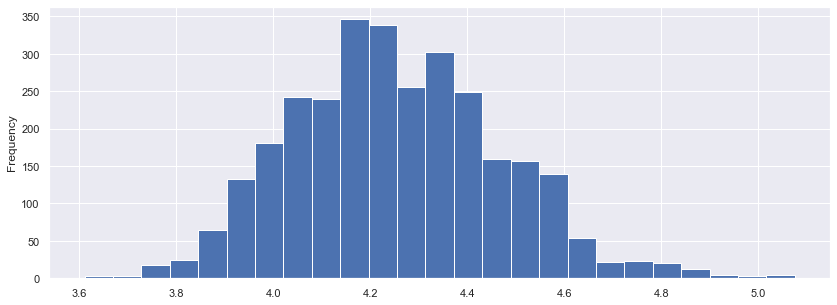

In [94]:
weight_samples_log = np.log(weight_samples)
weight_samples_log.plot(kind="hist", bins=25);

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [38]:
bra = athletes.query("nationality == 'BRA'")
usa = athletes.query("nationality == 'USA'")
can = athletes.query("nationality == 'CAN'")

bra.shape[0], usa.shape[0], can.shape[0]

(485, 567, 321)

In [11]:
bra_s = get_sample(bra, "height")
usa_s = get_sample(usa, "height")
can_s = get_sample(can, "height")

print(f"""BRA - Mean: {bra_s.mean():.3}, Variance: {bra_s.var():.3}
USA - Mean: {usa_s.mean():.3}, Variance: {usa_s.var():.3}
CAN - Mean: {can_s.mean():.3}, Variance: {can_s.var():.3}""")

BRA - Mean: 1.75, Variance: 0.0163
USA - Mean: 1.79, Variance: 0.0108
CAN - Mean: 1.75, Variance: 0.0146


In [12]:
(bra_s.isna()*1).sum(), (usa_s.isna()*1).sum(), (can_s.isna()*1).sum()

(0, 0, 0)

In [141]:
def q5():
    # Retorne aqui o resultado da questão 5.
    ttest_bra_usa = sct.ttest_ind(bra_s, usa_s, equal_var=False)
    return bool(ttest_bra_usa.pvalue >= 0.05)
q5()

False

In [143]:
sct.ttest_ind(bra_s, usa_s, equal_var=False)

Ttest_indResult(statistic=-2.397291376770201, pvalue=0.01748528165217272)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [14]:
def q6():
    # Retorne aqui o resultado da questão 6.
    ttest_bra_can = sct.ttest_ind(bra_s, can_s, equal_var=False)
    return bool(ttest_bra_can.pvalue >= 0.05)
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [124]:
def q7():
    # Retorne aqui o resultado da questão 7.
    ttest_usa_can = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy="omit")
    return float(round(ttest_usa_can.pvalue, 8))
q7()

0.00046601

In [99]:
usa.height.shape, can.height.shape

((567,), (321,))

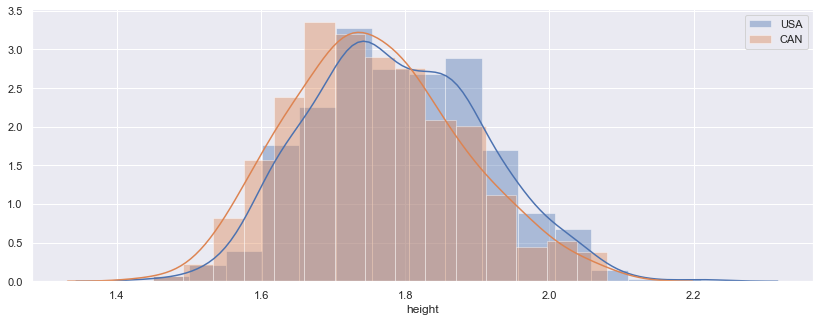

In [152]:
sns.distplot(usa.height.dropna(), bins=15, label="USA"), sns.distplot(can.height.dropna(), bins=15, label="CAN")
# usa.height.dropna().plot(kind="hist", bins=15, label="USA"), can.height.dropna().plot(kind="hist", bins=15, label="CAN")
plt.legend();

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

### Independent two-sample t-test

* #### Equal or unequal sample sizes, unequal variances. [wikipeadia](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)

This test, also known as Welch's t-test, is used only when the two population variances are not assumed to be equal (the two sample sizes may or may not be equal) and hence must be estimated separately. The t statistic to test whether the population means are different is calculated as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/eeecf40c622f1fa6b0fb9462c7c4b7030cbb47eb">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5024dd38e905d60353a324af2a05058fdd4ac3e7">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bf9929fa7098ff7e57a5c421c0fdcb3eea20435f">